In [9]:
import librosa
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt
import numpy as np
import glob
from IPython.display import Audio

In [10]:
rir_list = glob.glob('/mnt/Tesis/train/rir_reales/**/*.wav', recursive=True)
speech_list = glob.glob('/mnt/Tesis/train/**/*.flac', recursive=True)

Normalizo el speech y la rir para ver que pasa.

In [3]:
rir, fs = librosa.load(rir_list[0], sr=16000)
rir = rir[np.argmax(rir):]/np.max(abs(rir[np.argmax(rir):]))
speech, fs = librosa.load(speech_list[0], sr=16000)
speech = speech[:32000]/np.max(np.abs(speech[:32000]))
reverb = np.convolve(speech, rir)[:len(speech)]

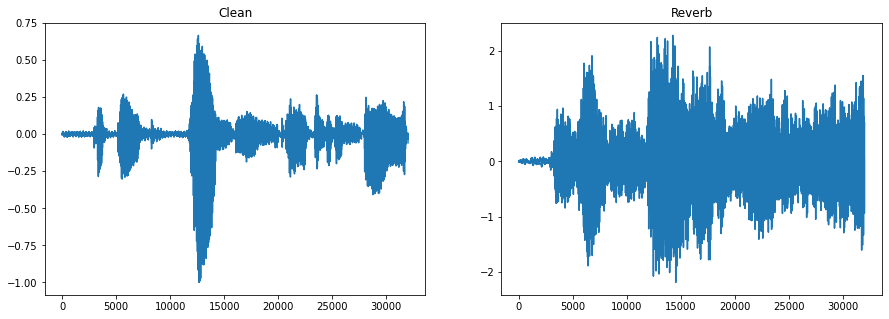

In [4]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(speech);axs[0].set_title('Clean')
axs[1].plot(reverb);axs[1].set_title('Reverb')
clean = speech

In [13]:
Audio(reverb, rate=fs)

In [5]:
EPS = np.finfo(float).eps
def normalise(array):
    array_min = -65
    array_max = 65
    norm_array = (array - array_min) / (array_max - array_min)
    return norm_array
#Genero las STFT
stft_clean = librosa.stft(clean, n_fft=512, hop_length=128)[:-1,:]# Descarto altas frecuencias
stft_clean = np.abs(stft_clean)
stft_reverb = librosa.stft(reverb, n_fft=512, hop_length=128)[:-1,:]
stft_reverb = np.abs(stft_reverb)

#Escala logaritmica
log_stft_clean = librosa.amplitude_to_db(stft_clean)
log_stft_reverb = librosa.amplitude_to_db(stft_reverb)

#Normalizacion
norm_stft_reverb = normalise(log_stft_reverb)
norm_stft_clean = normalise(log_stft_clean)

Es MUY importante mantener los valores de vmin y vmax en ambos plots para que el colobar sea representativo de ambos espectros. De otra manera, no se podrian hacer deducciones a partir de comparar los colores de amplitud

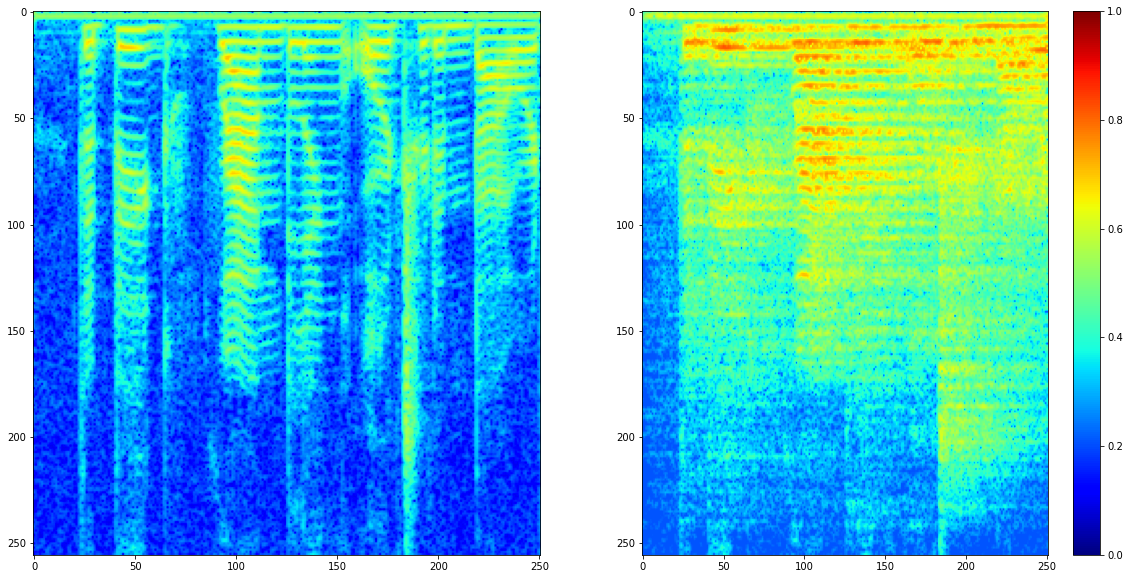

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(norm_stft_clean[:,:], vmin=0, vmax=1, cmap='jet', aspect='auto', label='clean')
plt.subplot(1, 2, 2)
plt.imshow(norm_stft_reverb[:,:], vmin=0, vmax=1, cmap='jet', aspect='auto', label='reverb')
plt.colorbar()

In [7]:
norm_stft_reverb.max()

0.82419175

# Rangos de amplitud

In [8]:
from tqdm import tqdm
maxs, mins = [], []
for i in tqdm(range(1000)):
    rir_path = np.random.choice(rir_list)
    speech_path = np.random.choice(speech_list)
    rir, fs = librosa.load(rir_path, sr=16000)
    rir = rir[np.argmax(rir):]/np.max(abs(rir[np.argmax(rir):]))
    clean, fs = librosa.load(speech_path, sr=16000)
    clean = clean/np.max(np.abs(clean))
    reverb = np.convolve(clean, rir)[:len(clean)]
    print(reverb.max())

    #Genero las STFT
    stft_clean = librosa.stft(clean, n_fft=512, hop_length=128)[:-1,:]# Descarto altas frecuencias
    stft_clean = np.abs(stft_clean)
    stft_reverb = librosa.stft(reverb, n_fft=512, hop_length=128)[:-1,:]
    stft_reverb = np.abs(stft_reverb)

    #Escala logaritmica
    log_stft_clean = librosa.amplitude_to_db(stft_clean)
    log_stft_reverb = librosa.amplitude_to_db(stft_reverb)

    maxs.append(np.max((log_stft_clean,log_stft_reverb)))
    mins.append(np.min((log_stft_clean,log_stft_reverb)))

  0%|                                                                                                       | 1/1000 [00:00<11:31,  1.44it/s]

1.9853971


  0%|▏                                                                                                      | 2/1000 [00:01<12:46,  1.30it/s]

4.86605


  0%|▎                                                                                                      | 3/1000 [00:02<10:47,  1.54it/s]

2.8033926


  0%|▍                                                                                                      | 4/1000 [00:02<11:32,  1.44it/s]

3.3006246


  0%|▌                                                                                                      | 5/1000 [00:03<09:33,  1.74it/s]

4.044747


  1%|▌                                                                                                      | 6/1000 [00:03<10:08,  1.63it/s]

2.4037154


  1%|▋                                                                                                      | 7/1000 [00:04<11:19,  1.46it/s]

3.0732942


  1%|▊                                                                                                      | 8/1000 [00:05<11:54,  1.39it/s]

3.036338


  1%|▉                                                                                                      | 9/1000 [00:06<11:53,  1.39it/s]

1.6881375


  1%|█                                                                                                     | 10/1000 [00:06<11:26,  1.44it/s]

2.65708


  1%|█                                                                                                     | 11/1000 [00:07<11:24,  1.45it/s]

2.7045496


  1%|█▏                                                                                                    | 12/1000 [00:08<12:06,  1.36it/s]

1.7134091


  1%|█▎                                                                                                    | 13/1000 [00:09<12:30,  1.31it/s]

2.5321014


  1%|█▍                                                                                                    | 14/1000 [00:09<12:30,  1.31it/s]

3.165908


  2%|█▌                                                                                                    | 15/1000 [00:10<12:43,  1.29it/s]

5.9121695


  2%|█▋                                                                                                    | 16/1000 [00:10<10:08,  1.62it/s]

4.35538


  2%|█▋                                                                                                    | 17/1000 [00:11<11:10,  1.47it/s]

5.347431


  2%|█▋                                                                                                    | 17/1000 [00:12<12:05,  1.35it/s]


KeyboardInterrupt: 

(array([  7.,  35.,  79., 192., 227., 234., 129.,  68.,  23.,   6.]),
 array([33.112488, 36.25554 , 39.398586, 42.541637, 45.684685, 48.827736,
        51.970787, 55.113834, 58.256886, 61.399933, 64.542984],
       dtype=float32),
 <BarContainer object of 10 artists>)

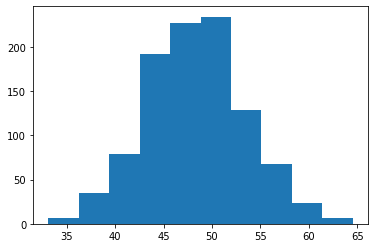

In [16]:
plt.hist(maxs)

(array([  3.,  16.,  48., 125., 253., 324., 184.,  40.,   6.,   1.]),
 array([-57.48281 , -55.052216, -52.62162 , -50.19102 , -47.760426,
        -45.32983 , -42.899235, -40.46864 , -38.03804 , -35.607445,
        -33.17685 ], dtype=float32),
 <BarContainer object of 10 artists>)

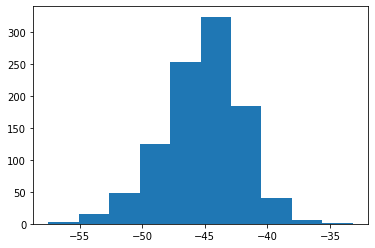

In [17]:
plt.hist(mins)